In [1]:
import anndata as ad
adata = ad.read_h5ad('pbmc_patients.h5ad')
adata.obs

,sample_id,condition,cluster,cell_type,multiplets,n_genes,condition_sample_id,condition_sample_id_cell_type
barcode,,,,,,,,
AAACATACATTTCC-1,1016,ctrl,9,CD14+ Monocytes,singlet,878,ctrl_1016,ctrl_1016_CD14+ Monocytes
AAACATACCAGAAA-1,1256,ctrl,9,CD14+ Monocytes,singlet,713,ctrl_1256,ctrl_1256_CD14+ Monocytes
AAACATACCATGCA-1,1488,ctrl,3,CD4 T cells,singlet,337,ctrl_1488,ctrl_1488_CD4 T cells
AAACATACCTCGCT-1,1256,ctrl,9,CD14+ Monocytes,singlet,850,ctrl_1256,ctrl_1256_CD14+ Monocytes
AAACATACCTGGTA-1,1039,ctrl,4,Dendritic cells,singlet,1111,ctrl_1039,ctrl_1039_Dendritic cells
...,...,...,...,...,...,...,...,...
TTTGCATGCCTGAA-1,1244,stim,6,CD4 T cells,singlet,468,stim_1244,stim_1244_CD4 T cells
TTTGCATGCCTGTC-1,1256,stim,4,B cells,singlet,819,stim_1256,stim_1256_B cells
TTTGCATGCTAAGC-1,107,stim,6,CD4 T cells,singlet,523,stim_107,stim_107_CD4 T cells


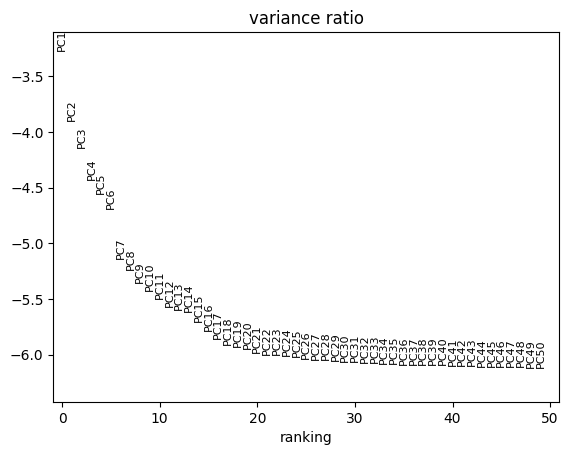

In [2]:
import scanpy as sc
sc.pp.pca(adata)
sc.pl.pca_variance_ratio(adata, log = True, n_pcs = 50)

In [3]:
sc.pp.neighbors(adata, n_pcs = 20)
sc.tl.umap(adata)

/home/Disk14T/wjl/tools/anaconda3/envs/wjl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/ipykernel_3290476/1887928266.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs = adata.obs.replace('ctrl', 'Ctrl').replace('stim', 'Stim')


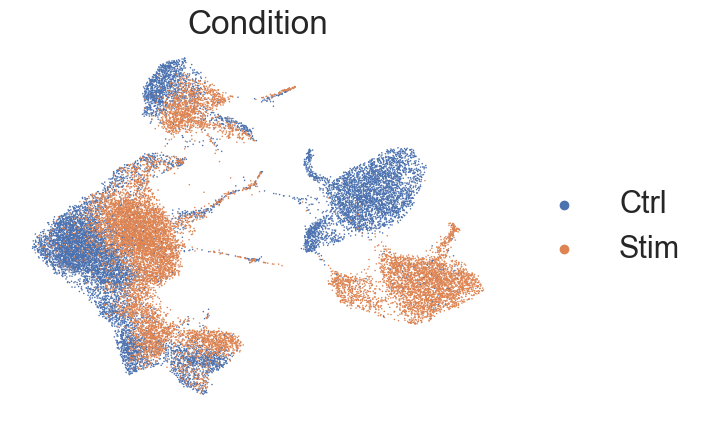

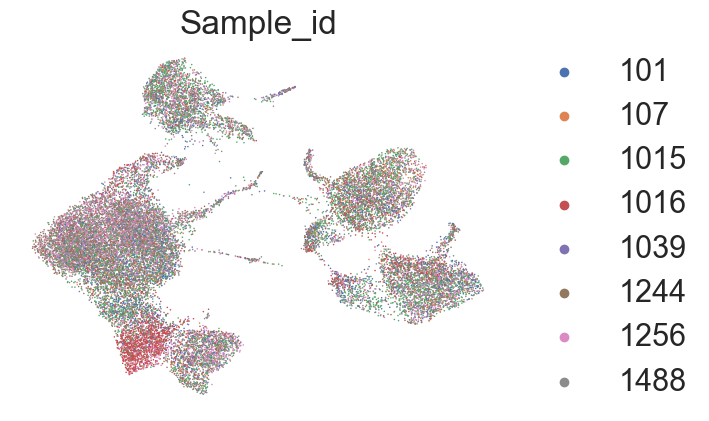

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style = 'white', font = 'Arial', font_scale = 2)
adata.obs = adata.obs.replace('ctrl', 'Ctrl').replace('stim', 'Stim')
adata.obs.rename(columns = {'condition': 'Condition'}, inplace = True)
adata.obs.rename(columns = {'sample_id': 'Sample_id'}, inplace = True)
sc.pl.umap(adata, color = 'Condition', palette = {
    'Ctrl': sns.color_palette()[0],
    'Stim': sns.color_palette()[1],
}, frameon = False)
plt.savefig(f'./umap_cond.jpg', dpi = 300, bbox_inches = 'tight')
plt.close()
sc.pl.umap(adata, color = 'Sample_id', palette = sns.color_palette(), frameon = False)
plt.savefig(f'./umap_cell_type.jpg', dpi = 300, bbox_inches = 'tight')
plt.close()